In [4]:
from langchain.embeddings import OpenAIEmbeddings
from dotenv import load_dotenv

load_dotenv()

embeddings = OpenAIEmbeddings()

In [5]:
import numpy as np

def calculate_l2(v1, v2):
    return np.linalg.norm(v1 - v2) ** 2

In [6]:
import matplotlib.pyplot as plt
import textwrap

def wrap_labels(labels, width):
    return [ '\n'.join(textwrap.wrap(label, width)) for label in labels ]

def plot(data, words):
    fig, ax = plt.subplots()
    ax.imshow(data, cmap="Blues")

    labels = wrap_labels(words, 30)
    ax.set_xticks(np.arange(len(words)), labels=labels)
    ax.set_yticks(np.arange(len(words)), labels=labels)

    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="left",
            rotation_mode="anchor")

    for i in range(len(words)):
        for j in range(len(words)):
            text = ax.text(j, i, round(data[i, j], 2),
                        ha="center", va="center")

    fig.tight_layout()
    plt.show()

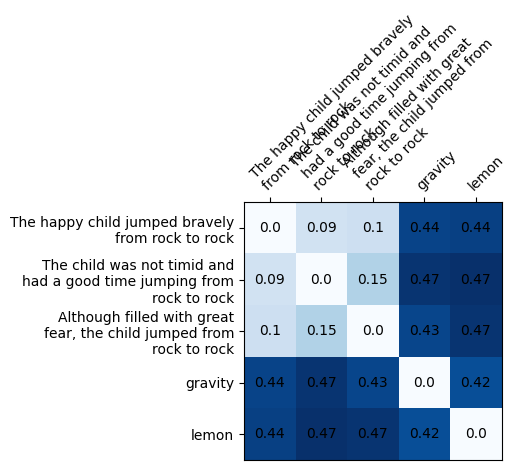

In [8]:
words = [
    "The happy child jumped bravely from rock to rock",
    "The child was not timid and had a good time jumping from rock to rock",
    "Although filled with great fear, the child jumped from rock to rock"
]

embs = [
    np.array(embeddings.embed_query(word)) for word in words
]

data = np.array([
    [calculate_l2(e1,e2) for e1 in embs] for e2 in embs
])

plot(data, words)